# Deep Learning for Image Classification


We will build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. The data set has 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

<b>Downloading the dataset</b>

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

Using matplotlib to view an image from the data set.**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

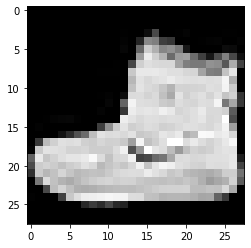

In [4]:
plt.imshow(x_train[0],cmap='gray')

In [5]:
y_train[0]

9

## Preprocessing the Data

**We now normalize the data by dividing by the max value of the image arrays(255).**

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

**Reshaping to include a 4 dimension of the single channel. This is similar to what we dont for the numbers MNIST data set.**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000,28,28,1)

In [11]:
x_test = x_test.reshape(10000,28,28,1)

**One-hot encoding y_train and y_test for categorical analysis by Keras.**

In [12]:
from keras.utils import to_categorical

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_cat_train = to_categorical(y_train)

In [15]:
y_cat_test = to_categorical(y_test)

## Building the Model

**Using Keras to create a model consisting of layers**

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(4, 4)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER, CAN BE CHANGED
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER.THERE ARE 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 149,418
Trainable params: 149,418
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**Training/Fitting the model to the x_train set. Amount of epochs can be varied.**

In [19]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4459 - accuracy: 0.8408
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3070 - accuracy: 0.8887
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2696 - accuracy: 0.9026
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2475 - accuracy: 0.9101
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2321 - accuracy: 0.9164
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2194 - accuracy: 0.9209
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2119 - accuracy: 0.9240
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2050 - accuracy: 0.92600s - loss: 0.2050 - accuracy: 0.92
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1989 - accuracy: 0.9298
Epoch 10/10
1875/1875 [=======

### Evaluating the Model

**We will show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.There are quite a few ways to do this, but we will follow the same procedure as MNIST.**

In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2930 - accuracy: 0.9037


[0.29296931624412537, 0.9036999940872192]

In [22]:
from sklearn.metrics import classification_report

In [23]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
y_cat_test.shape

(10000, 10)

In [25]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
predictions[0]

9

In [27]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.80      0.89      0.84      1000
           3       0.94      0.91      0.92      1000
           4       0.88      0.78      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.97      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

